In [34]:
import numpy as np
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

# Google 드라이브 마운트
drive.mount('/content/drive')

# CSV 파일 읽기 본인경로로 설정하기 !!
japan_data = pd.read_csv('/content/drive/MyDrive/japan_analyze/japan_fix.csv', encoding='utf-8')

# 데이터 확인
japan_data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,LOCATION,Country,VARIABLE,Variable,FREQUENCY,Frequency,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value
0,JPN,Japan,GDPVD,"Gross domestic product, volume in USD, at cons...",Q,Quarterly,1980-Q1,Q1-1980,USD,US Dollar,0,Units,2015.0,2015.0,2.573980e+12
1,JPN,Japan,GDPVD,"Gross domestic product, volume in USD, at cons...",Q,Quarterly,1980-Q2,Q2-1980,USD,US Dollar,0,Units,2015.0,2015.0,2.560410e+12
2,JPN,Japan,GDPVD,"Gross domestic product, volume in USD, at cons...",Q,Quarterly,1980-Q3,Q3-1980,USD,US Dollar,0,Units,2015.0,2015.0,2.617420e+12
3,JPN,Japan,GDPVD,"Gross domestic product, volume in USD, at cons...",Q,Quarterly,1980-Q4,Q4-1980,USD,US Dollar,0,Units,2015.0,2015.0,2.672660e+12
4,JPN,Japan,GDPVD,"Gross domestic product, volume in USD, at cons...",Q,Quarterly,1981-Q1,Q1-1981,USD,US Dollar,0,Units,2015.0,2015.0,2.688750e+12


In [35]:
print(japan_data['VARIABLE'].unique())

['GDPVD' 'GFAR' 'GGFLQ' 'IRL' 'ITISKV' 'CPV' 'XGSVD' 'GDPV' 'PMGS'
 'EXCHUD' 'EXCH' 'MGSVD' 'NLGQ' 'NLGXQ' 'PGDP' 'CPI' 'MGSV' 'CBGDPR'
 'XGSV' 'PXGS' 'CGV' 'UNR' 'LF' 'PPP' 'YDH' 'IRS' 'GDP' 'ITV' 'ET' 'PCORE'
 'CGV_ANNPCT' 'GDPV_ANNPCT' 'GDP_ANNPCT' 'ITV_ANNPCT' 'XGSV_ANNPCT'
 'MGSV_ANNPCT' 'CPV_ANNPCT' 'CPI_YTYPCT' 'PGDP_ANNPCT' 'PCORE_YTYPCT'
 'GDPV_USD']


In [36]:
japan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7380 entries, 0 to 7379
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LOCATION               7380 non-null   object 
 1   Country                7380 non-null   object 
 2   VARIABLE               7380 non-null   object 
 3   Variable               7380 non-null   object 
 4   FREQUENCY              7380 non-null   object 
 5   Frequency              7380 non-null   object 
 6   TIME                   7380 non-null   object 
 7   Time                   7380 non-null   object 
 8   Unit Code              7380 non-null   object 
 9   Unit                   7380 non-null   object 
 10  PowerCode Code         7380 non-null   int64  
 11  PowerCode              7380 non-null   object 
 12  Reference Period Code  4500 non-null   float64
 13  Reference Period       4500 non-null   float64
 14  Value                  7380 non-null   float64
dtypes: f

In [37]:
# 'TIME' 열을 '연도'와 '분기' 열 분할
japan_data['Year'], japan_data['Quarter'] = japan_data['TIME'].str.split('-Q', 1).str

# 'Quarter' 열을 분기 시작 달로 변환
japan_data['Month'] = (pd.to_numeric(japan_data['Quarter']) - 1) * 3 + 1

# 'Year'와 'Month' 열을 이용하여 'Date' 열을 생성
japan_data['Date'] = pd.to_datetime(japan_data['Year'] + '-' + japan_data['Month'].apply(str) + '-1')

# 'VARIABLE' 열의 값에 따라 데이터를 재구성
japan_data = japan_data.pivot(index='Date', columns='VARIABLE', values='Value')

# 2023년 이전 데이터만 선택
japan_data = japan_data[japan_data.index.year <= 2023]

japan_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 176 entries, 1980-01-01 to 2023-10-01
Data columns (total 41 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CBGDPR        176 non-null    float64
 1   CGV           176 non-null    float64
 2   CGV_ANNPCT    176 non-null    float64
 3   CPI           176 non-null    float64
 4   CPI_YTYPCT    176 non-null    float64
 5   CPV           176 non-null    float64
 6   CPV_ANNPCT    176 non-null    float64
 7   ET            176 non-null    float64
 8   EXCH          176 non-null    float64
 9   EXCHUD        176 non-null    float64
 10  GDP           176 non-null    float64
 11  GDPV          176 non-null    float64
 12  GDPVD         176 non-null    float64
 13  GDPV_ANNPCT   176 non-null    float64
 14  GDPV_USD      176 non-null    float64
 15  GDP_ANNPCT    176 non-null    float64
 16  GFAR          176 non-null    float64
 17  GGFLQ         176 non-null    float64
 18  IRL        

<ipython-input-37-e7708a1de4fa>:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  japan_data['Year'], japan_data['Quarter'] = japan_data['TIME'].str.split('-Q', 1).str
<ipython-input-37-e7708a1de4fa>:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  japan_data['Year'], japan_data['Quarter'] = japan_data['TIME'].str.split('-Q', 1).str


In [ ]:

# CSV 파일 읽기 본인경로로 설정하기 !!
japan_data = pd.read_csv('/content/drive/MyDrive/japan_analyze/convert_japan.csv', encoding='utf-8')

# 'Date' 열을 datetime 형식 전
japan_data['Date'] = pd.to_datetime(japan_data['Date'])


japan_data.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Date,CBGDPR,CGV,CGV_ANNPCT,CPI,CPI_YTYPCT,CPV,CPV_ANNPCT,ET,EXCH,...,PGDP,PGDP_ANNPCT,PMGS,PPP,PXGS,UNR,XGSV,XGSVD,XGSV_ANNPCT,YDH
0,1980-01-01,-1.469329,4.305120e+13,6.011608,0.723863,7.227463,1.558120e+14,0.372446,55060000.00,0.004106,...,0.916764,5.486810,1.489464,245.942080,1.755792,1.882982,1.882350e+13,1.555840e+11,28.580518,1.491760e+14
1,1980-04-01,-1.506340,4.336030e+13,2.903154,0.740833,8.137137,1.555100e+14,-0.773066,55256666.67,0.004300,...,0.940289,10.666264,1.477978,246.411607,1.754807,1.940254,1.909120e+13,1.577970e+11,5.811084,1.581890e+14
2,1980-07-01,-0.673843,4.385000e+13,4.594292,0.752777,8.106060,1.569860e+14,3.850894,55613333.33,0.004547,...,0.949513,3.982326,1.430790,243.253222,1.725762,2.060464,1.890280e+13,1.562390e+11,-3.889623,1.605810e+14
3,1980-10-01,0.075487,4.445170e+13,5.602963,0.761402,7.607829,1.578640e+14,2.254276,55513333.33,0.004745,...,0.960164,4.562716,1.427681,239.482848,1.721488,2.173402,2.018440e+13,1.668330e+11,30.006715,1.613410e+14
4,1981-01-01,0.210320,4.496130e+13,4.664866,0.771392,6.566102,1.576340e+14,-0.581116,55686666.67,0.004862,...,0.963415,1.361440,1.430542,233.736151,1.736442,2.183969,2.077900e+13,1.717470e+11,12.313472,1.637640e+14


In [ ]:

# 기존 코드: 'Date' 칼럼에서 2023년 이전의 데이터
japan_data = japan_data[japan_data['Date'].dt.year < 2023]

# Date를 인덱스로 설정합니다.
japan_data.set_index('Date', inplace=True)


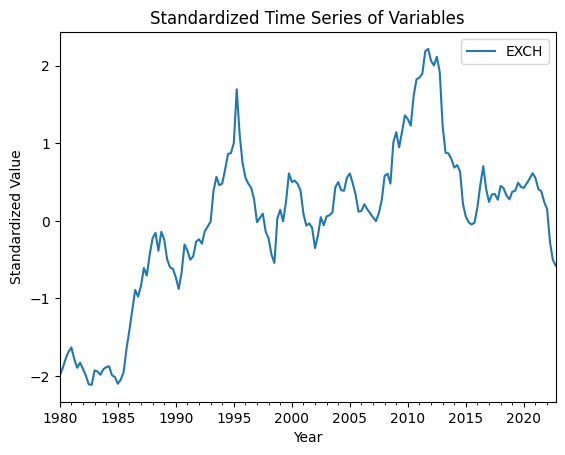

In [ ]:
# 가설1
# 변수 EXCH
variables = ['EXCH']

# 그 후 코드는 동일하게 이어가면 됩니다.
japan_data_selected = japan_data[variables]

# 표준화를 수행합니다.
scaler = StandardScaler()
japan_data_std = pd.DataFrame(scaler.fit_transform(japan_data_selected), columns=japan_data_selected.columns, index=japan_data_selected.index)

# 선 그래프로 시각화합니다.
japan_data_std.plot()
plt.title('Standardized Time Series of Variables')
plt.xlabel('Year')  # x축 레이블은 'Time'에서 'Year'로 바꿀 수도 있습니다.
plt.ylabel('Standardized Value')
plt.legend()
plt.show()

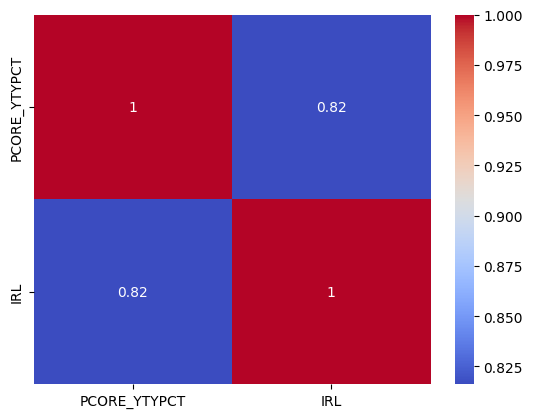

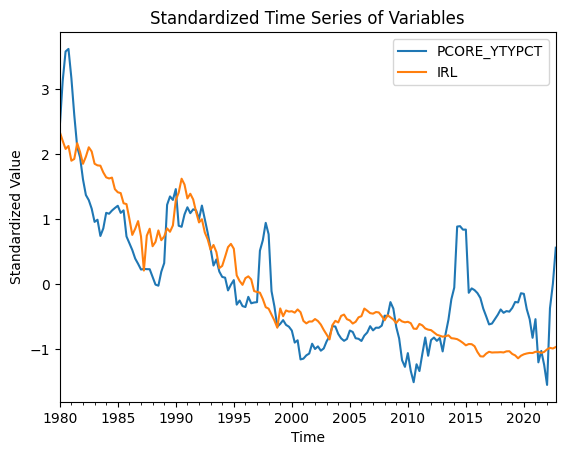

In [ ]:
#가설 2

# 금리와 인플레이션 상관관계 비교 분석
variables = ['PCORE_YTYPCT', 'IRL']


# 그 후 코드는 동일하게 이어가면 됩니다.
japan_data_selected = japan_data[variables]

# 표준화를 수행합니다.
scaler = StandardScaler()
japan_data_std = pd.DataFrame(scaler.fit_transform(japan_data_selected), columns=japan_data_selected.columns, index=japan_data_selected.index)

# 상관 계수를 계산합니다.
corr_matrix = japan_data_std.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

# 선 그래프로 시각화합니다.
japan_data_std.plot()
plt.title('Standardized Time Series of Variables')
plt.xlabel('Time')  # x축 레이블은 'Time'에서 'Year'로 바꿀 수도 있습니다.
plt.ylabel('Standardized Value')
plt.legend()
plt.show()


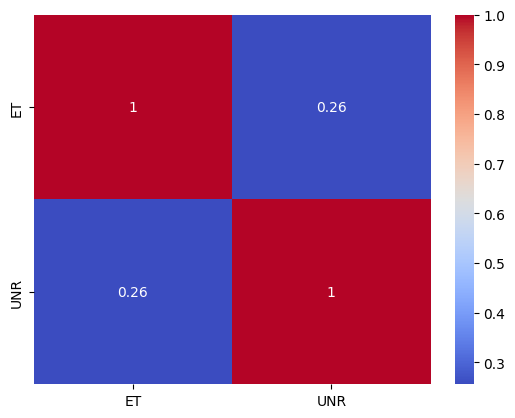

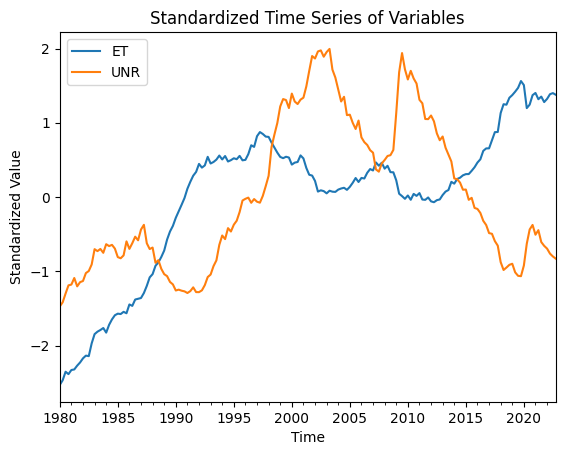

In [ ]:
#노동력,고용율,실업율
variables = ['ET','UNR']


# 그 후 코드는 동일하게 이어가면 됩니다.
japan_data_selected = japan_data[variables]

# 표준화를 수행합니다.
scaler = StandardScaler()
japan_data_std = pd.DataFrame(scaler.fit_transform(japan_data_selected), columns=japan_data_selected.columns, index=japan_data_selected.index)

# 상관 계수를 계산합니다.
corr_matrix = japan_data_std.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

# 선 그래프로 시각화합니다.
japan_data_std.plot()
plt.title('Standardized Time Series of Variables')
plt.xlabel('Time')  # x축 레이블은 'Time'에서 'Year'로 바꿀 수도 있습니다.
plt.ylabel('Standardized Value')
plt.legend()
plt.show()


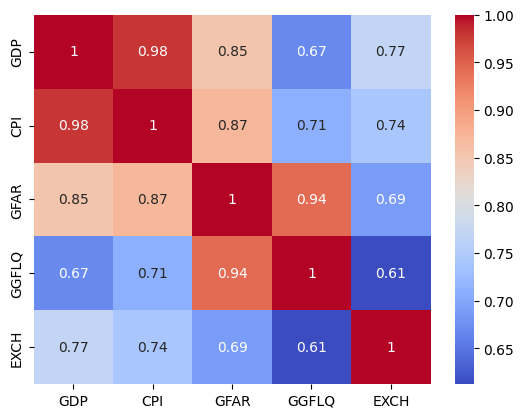

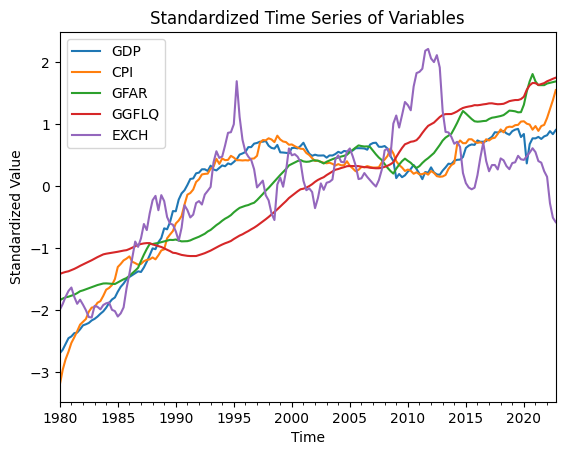

In [ ]:
#가설 2-1

variables = ['GDP', 'CPI', 'GFAR', 'GGFLQ','EXCH']

# 그 후 코드는 동일하게 이어가면 됩니다.
japan_data_selected = japan_data[variables]

# 표준화를 수행합니다.
scaler = StandardScaler()
japan_data_std = pd.DataFrame(scaler.fit_transform(japan_data_selected), columns=japan_data_selected.columns, index=japan_data_selected.index)

# 상관 계수를 계산합니다.
corr_matrix = japan_data_std.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

# 선 그래프로 시각화합니다.
japan_data_std.plot()
plt.title('Standardized Time Series of Variables')
plt.xlabel('Time')  # x축 레이블은 'Time'에서 'Year'로 바꿀 수도 있습니다.
plt.ylabel('Standardized Value')
plt.legend()
plt.show()


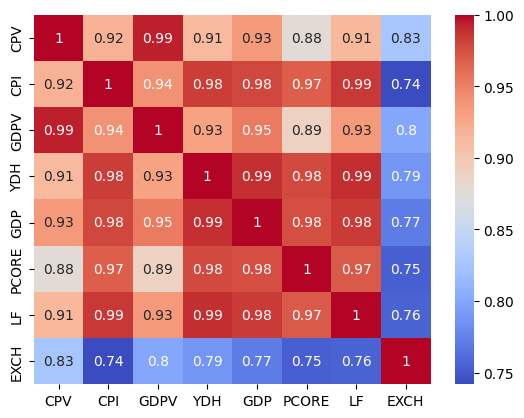

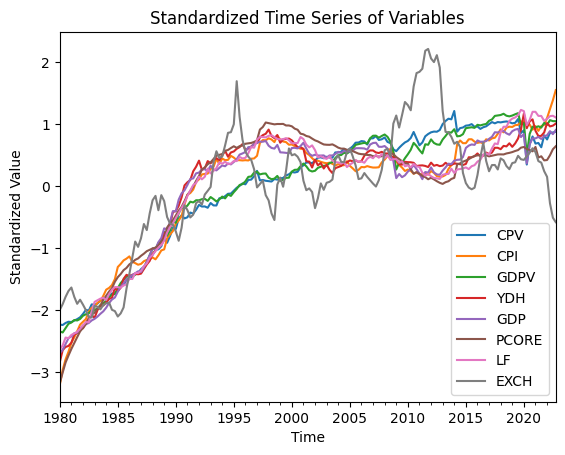

In [ ]:
#가설 3

variables = ['CPV', 'CPI', 'GDPV', 'YDH','GDP','PCORE','LF','EXCH']

# 그 후 코드는 동일하게 이어가면 됩니다.
japan_data_selected = japan_data[variables]

# 표준화를 수행합니다.
scaler = StandardScaler()
japan_data_std = pd.DataFrame(scaler.fit_transform(japan_data_selected), columns=japan_data_selected.columns, index=japan_data_selected.index)

# 상관 계수를 계산합니다.
corr_matrix = japan_data_std.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

# 선 그래프로 시각화합니다.
japan_data_std.plot()
plt.title('Standardized Time Series of Variables')
plt.xlabel('Time')  # x축 레이블은 'Time'에서 'Year'로 바꿀 수도 있습니다.
plt.ylabel('Standardized Value')
plt.legend()
plt.show()


In [ ]:
#가설 3 분석

# 각 특성과 'EXCH' 간의 상관 계수 계산
correlations = japan_data.corr()['EXCH'].sort_values()

# 상위 10개 특성 출력
print("Most Positive Correlations:\n", correlations.tail(11))
print("\nMost Negative Correlations:\n", correlations.head(10))


Most Positive Correlations:
 CGV         0.721931
CPI         0.741792
PCORE       0.753482
LF          0.755680
GDP         0.770794
YDH         0.787671
GDPV        0.800073
GDPVD       0.800073
GDPV_USD    0.800073
CPV         0.826126
EXCH        1.000000
Name: EXCH, dtype: float64

Most Negative Correlations:
 EXCHUD         -0.945222
PXGS           -0.906133
IRS            -0.772929
IRL            -0.764399
PPP            -0.750708
PCORE_YTYPCT   -0.745053
PMGS           -0.700907
CPI_YTYPCT     -0.632024
NLGXQ          -0.520766
NLGQ           -0.464283
Name: EXCH, dtype: float64


In [ ]:
japan_data_std.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 172 entries, 1980-01-01 to 2022-10-01
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CPV     172 non-null    float64
 1   CPI     172 non-null    float64
 2   GDPV    172 non-null    float64
 3   YDH     172 non-null    float64
 4   GDP     172 non-null    float64
 5   PCORE   172 non-null    float64
 6   LF      172 non-null    float64
 7   EXCH    172 non-null    float64
dtypes: float64(8)
memory usage: 12.1 KB


In [ ]:
# 입력 변수와 출력 변수를 지정 입력 GFAR CPI GDP 출력 ET
X = japan_data_std[['CPV', 'CPI', 'GDPV','GDP', 'YDH','PCORE','LF']]
y = japan_data_std['EXCH']

# 데이터를 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Training set score: ", model.score(X_train, y_train))
print("Test set score: ", model.score(X_test, y_test))

if np.mean(y_pred) > 0:
    print("EXCH는 향후 증가할 것이다.")
elif np.mean(y_pred) == 0:
    print("EXCH는 향후 유지할것으로 보인다.")
else:
    print("EXCH는 향후 감소할 것이다.")


Training set score:  0.8357275096072141
Test set score:  0.7285540186931003
EXCH는 향후 감소할 것이다.


In [ ]:
# Random Forest Regressor 모델 생성
model_rf = RandomForestRegressor(n_estimators=100, random_state=0)

# 모델 학습
model_rf.fit(X_train, y_train)

# 예측 수행
y_pred_rf = model_rf.predict(X_test)

# 성능 평가
print("Training set score: ", model_rf.score(X_train, y_train))
print("Test set score: ", model_rf.score(X_test, y_test))

# 예측 값의 평균을 계산
average_prediction = np.mean(y_pred_rf)

# 평균 예측 값에 따라 향후 엔화 환율 동향을 예측
if average_prediction > 0:
    print("엔화 환율은 향후 증가할 것으로 예상됩니다.")
elif average_prediction == 0:
    print("엔화 환율은 향후 유지될 것으로 예상됩니다.")
else:
    print("엔화 환율은 향후 감소할 것으로 예상됩니다.")



Training set score:  0.9902477726426719
Test set score:  0.9522659243010911
엔화 환율은 향후 증가할 것으로 예상됩니다.
